## Genetic Algorithm Demonstration

This demonstration will show the genetic algorithm optimizing a randomly generated bipartite graph. Each improvement of the fitness throughout the generations will be plotted. Finally, the best solution will be compared with the original generated bipartite graph.

In [12]:
import pylab as pl
import matplotlib.pyplot as plt
import Optimize_Layout.Gen_Bipartite_Graph as gbg
import Optimize_Layout.Optimize_Line_Crossings as olc
import Optimize_Layout.GA_Visualization as gv
import Optimize_Layout.Bi_Graph as big

import Optimize_Layout.Random_Search as rs

import Demonstrations.GA_vs_Random as gar

In [13]:
genetic_args = {}
genetic_args["pop_size"] = 20
genetic_args["max_gen"] = 500
genetic_args["tourny_perc"] = 0.2
genetic_args["elite_perc"] =  0.1
genetic_args["crossover_rate"] = 1.0
genetic_args["mutation_rate"] = 0.2

min_left_nodes = 20
max_left_nodes = 20
min_right_nodes = 20
max_right_nodes = 20
num_edges = 20

plot_network = False

network = gbg.gen_bipartite_graph(min_left_nodes, max_left_nodes, min_right_nodes, max_right_nodes, num_edges)

bipartite_graph = big.Bi_Graph(network)
bipartite_graph.set_node_dict_attr()

best_individuals = olc.opt_line_crossings(bipartite_graph, plot_network, **genetic_args)

Initial Fitness: 119 crossings
Initializing Population
Population Initialized
Generation 0!
Best Fitness: 82 crossings
Generation 1!
Best Fitness: 75 crossings
Generation 2!
Best Fitness: 69 crossings
Generation 3!
Best Fitness: 69 crossings
Generation 4!
Best Fitness: 69 crossings
Generation 5!
Best Fitness: 69 crossings
Generation 6!
Best Fitness: 69 crossings
Generation 7!
Best Fitness: 69 crossings
Generation 8!
Best Fitness: 67 crossings
Generation 9!
Best Fitness: 67 crossings
Generation 10!
Best Fitness: 66 crossings
Generation 11!
Best Fitness: 66 crossings
Generation 12!
Best Fitness: 63 crossings
Generation 13!
Best Fitness: 55 crossings
Generation 14!
Best Fitness: 55 crossings
Generation 15!
Best Fitness: 55 crossings
Generation 16!
Best Fitness: 49 crossings
Generation 17!
Best Fitness: 46 crossings
Generation 18!
Best Fitness: 44 crossings
Generation 19!
Best Fitness: 44 crossings
Generation 20!
Best Fitness: 42 crossings
Generation 21!
Best Fitness: 42 crossings
Generati

### Random Search Comparison

The number of function evaluations will be used to randomly generate the same number of solutions. The best solution will be taken and compared with the genetic algorithm.


In [14]:
best_random_ind, best_random_fitness = rs.random_search(bipartite_graph, genetic_args["max_gen"], genetic_args["pop_size"])

Best Fitness: 91 crossings
Best Fitness: 82 crossings
Best Fitness: 79 crossings
Best Fitness: 74 crossings
Best Fitness: 72 crossings
Best Fitness: 49 crossings
Best Fitness: 47 crossings
Best Fitness: 45 crossings


Plotting the genetic algorithm solution along side the random solution:

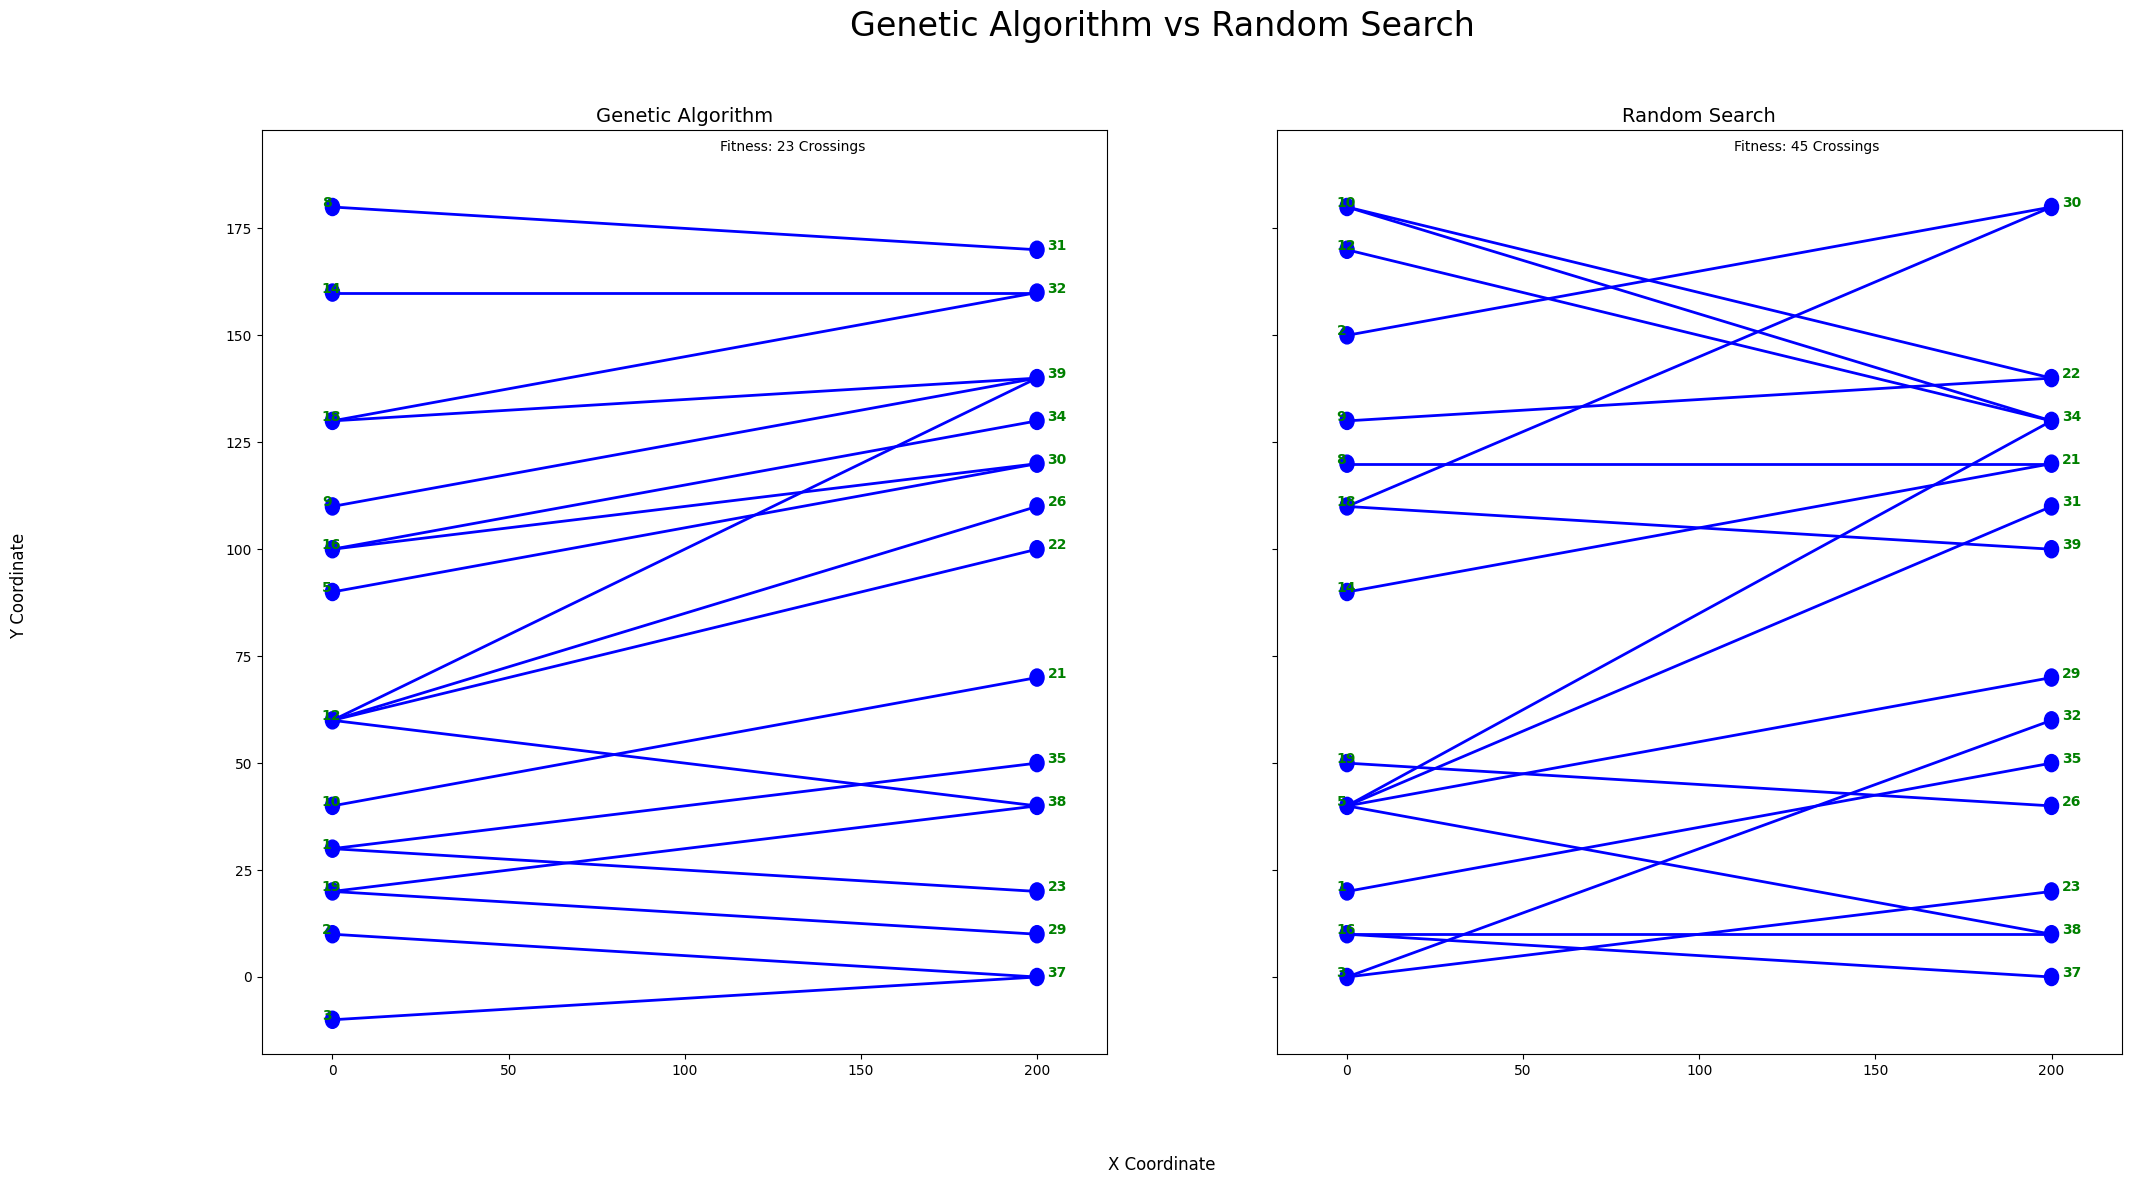

In [15]:
plt.rcParams['figure.figsize'] = [24, 12]
gv.compare_plots(best_individuals[-1][0][1],"Genetic Algorithm", best_random_ind, "Random Search", -1)

The above example presents one iteration of the genetic algorithm vs the random search. The genetic algorithm is able to outperform the random search algorithm. The next demonstration proves that the genetic algorithm is able to outperform the random search algorithm over the course of a given number of iterations. The number of iterations used for the demo will be set to 50.

### GA vs Random: Average Comparisons

In [16]:
num_iterations = 50

genetic_args = {}
genetic_args["pop_size"] = 20
genetic_args["max_gen"] = 500
genetic_args["tourny_perc"] = 0.2
genetic_args["elite_perc"] =  0.1
genetic_args["crossover_rate"] = 1.0
genetic_args["mutation_rate"] = 0.2

min_left_nodes = 20
max_left_nodes = 20
min_right_nodes = 20
max_right_nodes = 20
num_edges = 20

In [17]:
best_ga_fitnesses, best_random_fitnesses = gar.compare_random(genetic_args, num_iterations, min_left_nodes, max_left_nodes, min_right_nodes, max_right_nodes, num_edges)

Initial Fitness: 96 crossings
Initializing Population
Population Initialized
Generation 0!
Best Fitness: 69 crossings
Generation 1!
Best Fitness: 69 crossings
Generation 2!
Best Fitness: 69 crossings
Generation 3!
Best Fitness: 69 crossings
Generation 4!
Best Fitness: 69 crossings
Generation 5!
Best Fitness: 65 crossings
Generation 6!
Best Fitness: 62 crossings
Generation 7!
Best Fitness: 62 crossings
Generation 8!
Best Fitness: 60 crossings
Generation 9!
Best Fitness: 60 crossings
Generation 10!
Best Fitness: 57 crossings
Generation 11!
Best Fitness: 57 crossings
Generation 12!
Best Fitness: 52 crossings
Generation 13!
Best Fitness: 52 crossings
Generation 14!
Best Fitness: 51 crossings
Generation 15!
Best Fitness: 51 crossings
Generation 16!
Best Fitness: 51 crossings
Generation 17!
Best Fitness: 45 crossings
Generation 18!
Best Fitness: 45 crossings
Generation 19!
Best Fitness: 45 crossings
Generation 20!
Best Fitness: 44 crossings
Generation 21!
Best Fitness: 44 crossings
Generatio

In [18]:
# Average and print results
average_ga_fitness = sum(best_ga_fitnesses)/len(best_ga_fitnesses)
average_random_fitness = sum(best_random_fitnesses)/len(best_random_fitnesses)
print("Averaged Over {} Generations".format(num_iterations))
print("    GA Average Fitness: {}".format(average_ga_fitness))
print("Random Average Fitness: {}".format(average_random_fitness))

Averaged Over 50 Generations
    GA Average Fitness: 21.86
Random Average Fitness: 46.62


The GA is able to on average perform about twice as good as the random search algorithm. This experiment was done for a smaller graph, the next experiment takes a look at if the performance gain scales well with higher complexity.

### GA vs Random: Large Graphs

The following demonstraion will up the size of the graphs and compare with just a single iteration.

In [19]:
genetic_args = {}
genetic_args["pop_size"] = 20
genetic_args["max_gen"] = 10000
genetic_args["tourny_perc"] = 0.2
genetic_args["elite_perc"] =  0.1
genetic_args["crossover_rate"] = 1.0
genetic_args["mutation_rate"] = 0.2

min_left_nodes = 100
max_left_nodes = 100
min_right_nodes = 100
max_right_nodes = 100
num_edges = 150

In [20]:
network = gbg.gen_bipartite_graph(min_left_nodes, max_left_nodes, min_right_nodes, max_right_nodes, num_edges)

bipartite_graph = big.Bi_Graph(network)
bipartite_graph.set_node_dict_attr()

best_ga_individuals = olc.opt_line_crossings(bipartite_graph, False, **genetic_args)

best_random_ind, best_random_fitness = rs.random_search(bipartite_graph, genetic_args["max_gen"], genetic_args["pop_size"])

Initial Fitness: 5869 crossings
Initializing Population


Population Initialized
Generation 0!
Best Fitness: 5166 crossings
Generation 1!
Best Fitness: 5087 crossings
Generation 2!
Best Fitness: 5087 crossings
Generation 3!
Best Fitness: 5087 crossings
Generation 4!
Best Fitness: 5068 crossings
Generation 5!
Best Fitness: 5068 crossings
Generation 6!
Best Fitness: 5031 crossings
Generation 7!
Best Fitness: 5031 crossings
Generation 8!
Best Fitness: 4929 crossings
Generation 9!
Best Fitness: 4928 crossings
Generation 10!
Best Fitness: 4908 crossings
Generation 11!
Best Fitness: 4898 crossings
Generation 12!
Best Fitness: 4805 crossings
Generation 13!
Best Fitness: 4794 crossings
Generation 14!
Best Fitness: 4793 crossings
Generation 15!
Best Fitness: 4690 crossings
Generation 16!
Best Fitness: 4686 crossings
Generation 17!
Best Fitness: 4686 crossings
Generation 18!
Best Fitness: 4645 crossings
Generation 19!
Best Fitness: 4645 crossings
Generation 20!
Best Fitness: 4576 crossings
Generation 21!
Best Fitness: 4576 crossings
Generation 22!
Best

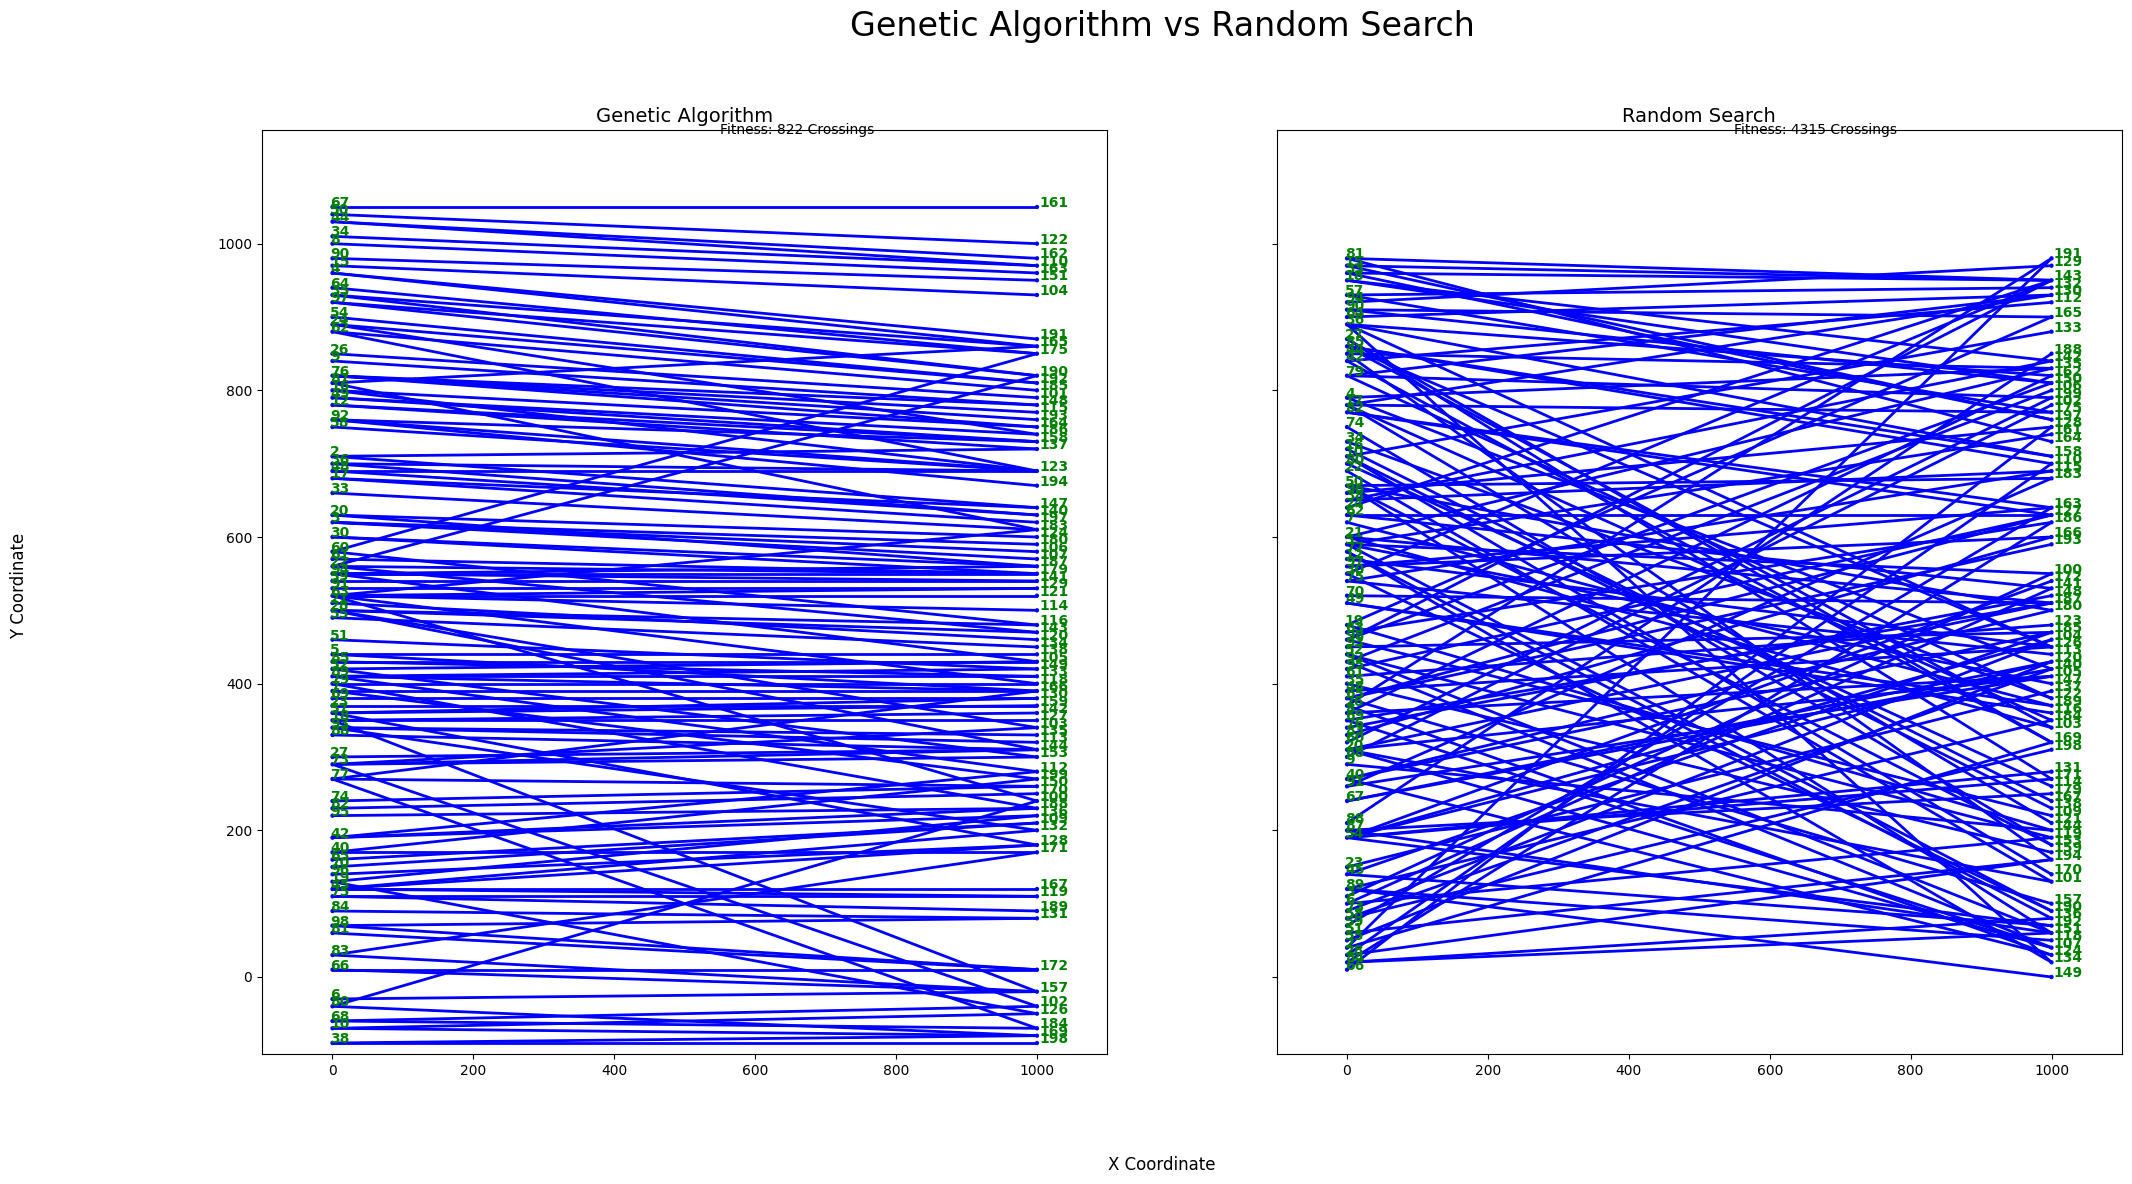

In [21]:
plt.rcParams['figure.figsize'] = [24, 12]
gv.compare_plots(best_ga_individuals[-1][0][1], "Genetic Algorithm", best_random_ind, "Random Search", -1)

When comparing a more complex graph with more edges, the benefits of the genetic algorithm scale considerably. Note the above graphs are hard to follow because of how many connections are made between the levels, but the fitness values can be compared. The genetic algorithm does take a significant longer time to converge than simply using the random solution. With more careful tuning and better fitness implementation using parallelization, the genetic algorithm can be sped up considerably.